In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam 
from keras.utils.np_utils import to_categorical
from keras.datasets import mnist
from keras.layers import Flatten
from keras.layers import Dropout
from keras.models import Model
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
import random
import matplotlib.image as mpimg

Using TensorFlow backend.


In [0]:
np.random.seed(0)

In [3]:
data = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
(x_train,y_train),(x_test,y_test) = data

In [5]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


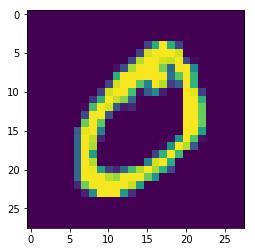

In [6]:
plt.imshow(x_train[1])

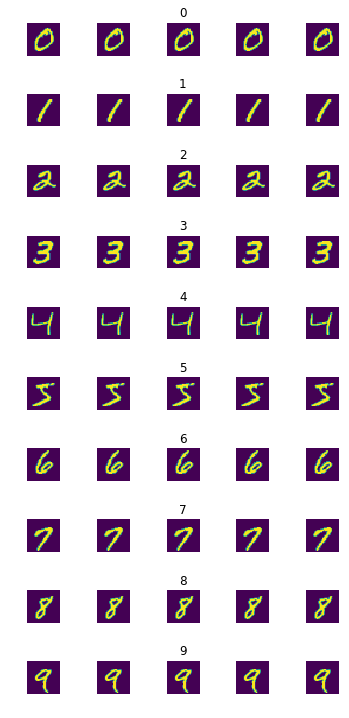

In [7]:
num_of_samples = []
num_classes = 10
cols=5
fig,axs = plt.subplots(nrows=num_classes,ncols=cols,figsize=(5,10))
fig.tight_layout()
for i in range(cols):
  for j in range(num_classes):
    x_selected = x_train[y_train == j]
    axs[j][i].imshow(x_selected[0])
#     axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) -1 )),:,:],cmap='gray')
    axs[j][i].axis("off")
    if i == 2:
      axs[j][i].set_title(str(j))
      num_of_samples.append(len(x_selected))

<BarContainer object of 10 artists>

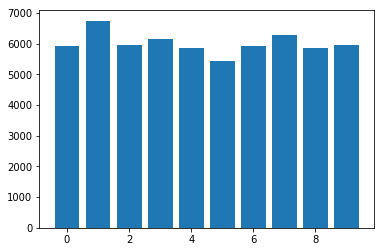

In [8]:
numbers = [0,1,2,3,4,5,6,7,8,9]
plt.bar(numbers,num_of_samples)

In [0]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)


In [0]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [0]:
x_train = x_train/255
x_test = x_test/255

In [0]:
def le_net():
  model = Sequential()
  model.add(Conv2D(30,(5,5),input_shape = (28,28,1),activation = 'relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(15,(3,3),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(500,activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes,activation='softmax'))
  model.compile(Adam(lr=0.01),loss = 'categorical_crossentropy',metrics=['accuracy'])
  return model

In [13]:
lenet = le_net()
lenet.summary()

W0618 08:27:23.464889 139697053415296 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0618 08:27:23.485086 139697053415296 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0618 08:27:23.488584 139697053415296 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0618 08:27:23.508551 139697053415296 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0618 08:27:23.549080 139697053415296 deprecation_wrapp

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               188000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
__________

In [14]:
history = lenet.fit(x_train,
                   y_train,
                   epochs=10,
                   validation_split=0.1,
                   batch_size=400,
                   verbose=1,shuffle=1)

W0618 08:27:23.787070 139697053415296 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 4s 74us/step - loss: 0.2631 - acc: 0.9154 - val_loss: 0.0471 - val_acc: 0.9857
Epoch 2/10
54000/54000 [==============================] - 2s 38us/step - loss: 0.0988 - acc: 0.9698 - val_loss: 0.0435 - val_acc: 0.9870
Epoch 3/10
54000/54000 [==============================] - 2s 38us/step - loss: 0.0809 - acc: 0.9759 - val_loss: 0.0395 - val_acc: 0.9892
Epoch 4/10
54000/54000 [==============================] - 2s 38us/step - loss: 0.0750 - acc: 0.9779 - val_loss: 0.0402 - val_acc: 0.9887
Epoch 5/10
54000/54000 [==============================] - 2s 38us/step - loss: 0.0713 - acc: 0.9785 - val_loss: 0.0339 - val_acc: 0.9908
Epoch 6/10
54000/54000 [==============================] - 2s 37us/step - loss: 0.0790 - acc: 0.9771 - val_loss: 0.0359 - val_acc: 0.9903
Epoch 7/10
54000/54000 [==============================] - 2s 37us/step - loss: 0.0674 - acc: 0.9799 - val_loss: 0.0414 - val_acc:

Text(0.5, 0, 'epoch')

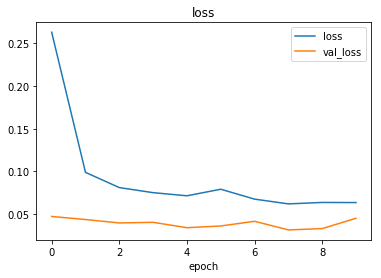

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.title('loss')
plt.xlabel('epoch')


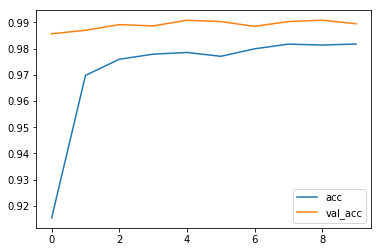

In [16]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc','val_acc'])


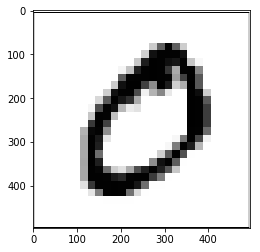

In [17]:
import cv2 as cv
from PIL import Image
import requests
url = 'http://neuralnetworksanddeeplearning.com/images/mnist_complete_zero.png'
response = requests.get(url,stream=True)
img = Image.open(response.raw).convert('L')
plt.imshow(img,cmap='gray')

In [0]:
img = np.array(img)

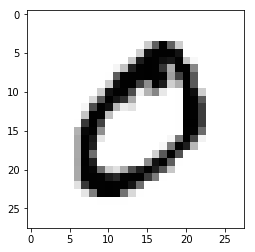

In [19]:
img_array = np.asarray(img)
res = cv.resize(img_array,(28,28))
# image = 255-res
plt.imshow(res,cmap='gray')

In [0]:
img = res-255   #Normailization

In [0]:
img = img.reshape(1,28,28,1)

In [22]:
lenet.predict_classes(img)

array([0])